# Tarea 2 - Data profiling con R

### Grupo 10:
     - Lucía Bouza  C.I 42897970
     - Juan Manuel Machado  C.I 46919180

## 1. Objetivo 

El objetivo de esta tarea consiste en aplicar técnicas y herramientas para el análisis y estudio de un dataset. Se elige realizarlo en R, sobre el dataset indicado en el tutorial https://datascienceplus.com/blazing-fast-eda-in-r-with-dataexplorer/

## 2. Características del dataset

El dataset que utilizaremos para realizar data profiling es es el de ratings de barras de chocolates, propuesto por el tutorial. Una primera aproximación para entender el dataset con el que trabajaremos es leer la información proporcionada por el proveedor del dataset. en nuestro caso detallaremos las características que nos provee el sitio https://www.kaggle.com/rtatman/chocolate-bar-ratings

**Sobre qué trata el dataset?

El dataset contiene puntuaciones de más de 1700 barras de chocolate, junto con datos de origen y variedad de los granos, porcentaje de cacao y empresa que los fabrica. El dataset fue compilado por Brady Brelinski, miembro fundador de la Manhattan Chocolate Society.

El dataset cuenta con 1795 registros. Cuenta con 9 columnas con las siguientes características:
* Company (Maker-if known): Nombre de la fábrica que produce la barra de chocolate (string)
* Specific Bean Origin or Bar Name: región específica del origen de los granos (string)
* REFA: valor que hace referencia a la frescura de dicho dato.a mayor valor, el dato es más reciente (numérico)
* ReviewDate: fecha de publicación del informe de la barra (numérico)
* CocoaPercent: porcentaje de cacao (string)
* CompanyLocation: País de origen de la fábrica (string)
* Rating:puntuación. 5 es la mejor nota, 1 la peor (numérico)
* BeanType: tipo de grano (string)
* Broad Bean: Zona de origen del grano (string)

Ejecutemos los comandos del tutorial para obtener más datos acerca de los atributos, su distribución, valores, relaciones, etc. 

## 3. Exploración del dataset

A continuación seguiremos los pasos del tutorial, explicando qué se está realizando y un breve análisis de los resultados de cada comando.

### 3.1 Carga de librerías y dataset

en esta sección cargaremos librerías que utilizaremos, setearemos la variable de entorno Pandoc (para no tener dificultades a la hora de mostrar gráficos y renderizaciones) y cargaremos el dataset en la variable choco. En la carga del dataset definiremos los espacios en blanco y caracteres especiales vacíos (caracter ASCII 160) como NULL (NA en R). 


Imprimiremos las primeras líneas para tener una idea de los datos de nuestro dataset.

In [1]:
library(DataExplorer)
library(IRdisplay)
library(repr)

Sys.setenv(RSTUDIO_PANDOC= "/Applications/RStudio.app/Contents/MacOS/pandoc")

choco = read.csv('flavors_of_cacao.csv', header = T, stringsAsFactors = F, na.strings=c("", " ",intToUtf8(160),NA))
head(choco)

Company...Maker.if.known. Specific.Bean.Origin.or.Bar.Name REF  Review.Date
1 A. Morin                  Agua Grande                      1876 2016       
2 A. Morin                  Kpime                            1676 2015       
3 A. Morin                  Atsane                           1676 2015       
4 A. Morin                  Akata                            1680 2015       
5 A. Morin                  Quilla                           1704 2015       
6 A. Morin                  Carenero                         1315 2014       
  Cocoa.Percent Company.Location Rating Bean.Type Broad.Bean.Origin
1 63%           France           3.75   NA        Sao Tome         
2 70%           France           2.75   NA        Togo             
3 70%           France           3.00   NA        Togo             
4 70%           France           3.50   NA        Togo             
5 70%           France           3.50   NA        Peru             
6 70%           France           2.75   Criollo   Venezuela

### 3.2 Limpieza de datos

Algunos datos pueden venir en formatos que no nos convengan. Por ejemplo, una clase podría tener los valores "positive" y "negative", y quizá para un mejor manejo nos convenga transformarla a 1 y 0. En nuestro caso el atributo CocoaPercent, que debería ser numérico, viene acompañado del símbolo "%". Lo quitaremos a continuación con los siguientes comandos. También pasamos la fecha a tipo string. 


In [2]:
choco$Cocoa.Percent = as.numeric(gsub('%','',choco$Cocoa.Percent))
choco$Review.Date = as.character(choco$Review.Date)

### 3.3 Análisis de variables

Nos interesa también saber de que tipo son nuestras variables. Si bien tenemos los datos sobre este dataset del sitio https://www.kaggle.com/, el origen de dataset podría ser otro y nosotros no tener a disposición esta información. ejecutamos el siguiente comando que nos aporta estos datos, y vemos que coinciden con la información provista por el sitio, y detallada en el punto 2.

In [3]:
plot_str(choco)

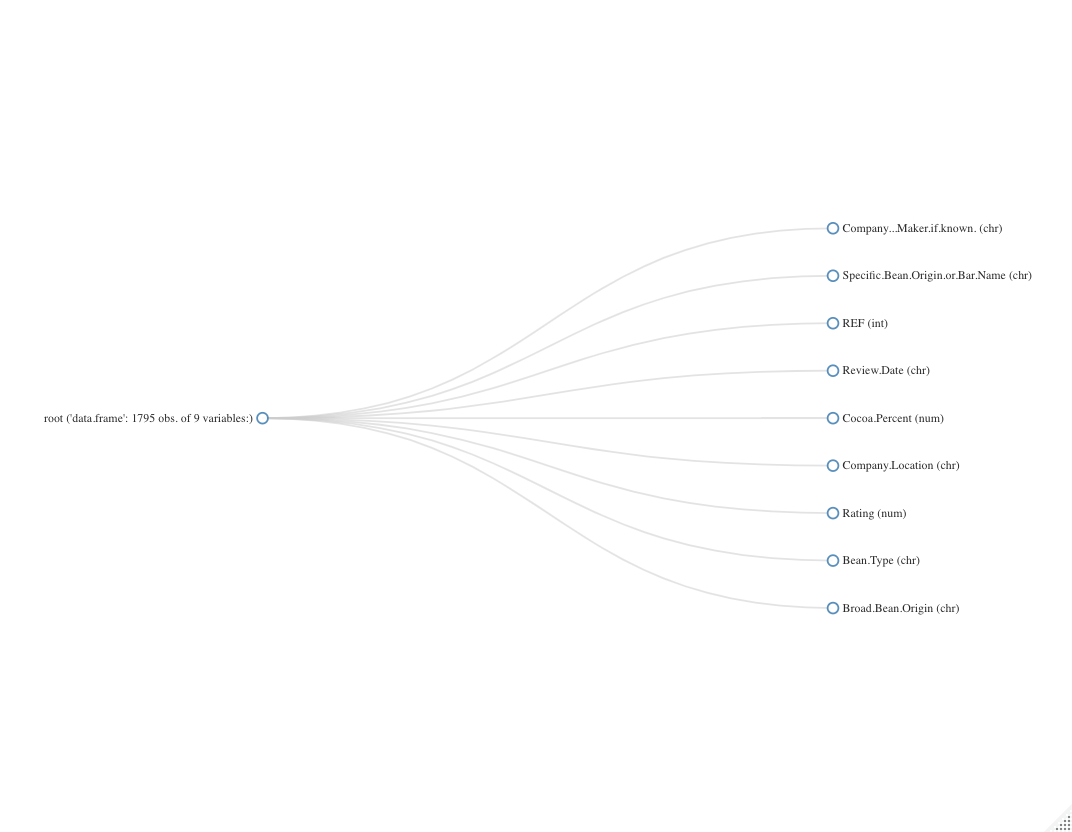

### 3.4 Verificación de valores faltantes

A continuación evaluamos el dataset para determinar si tenemos valores faltantes. Es importante saber este dato ya que, si por ejemplo queremos aplicar algún algoritmo de aprendizaje automático al dataset, no todos los algoritmos son adecuados. 

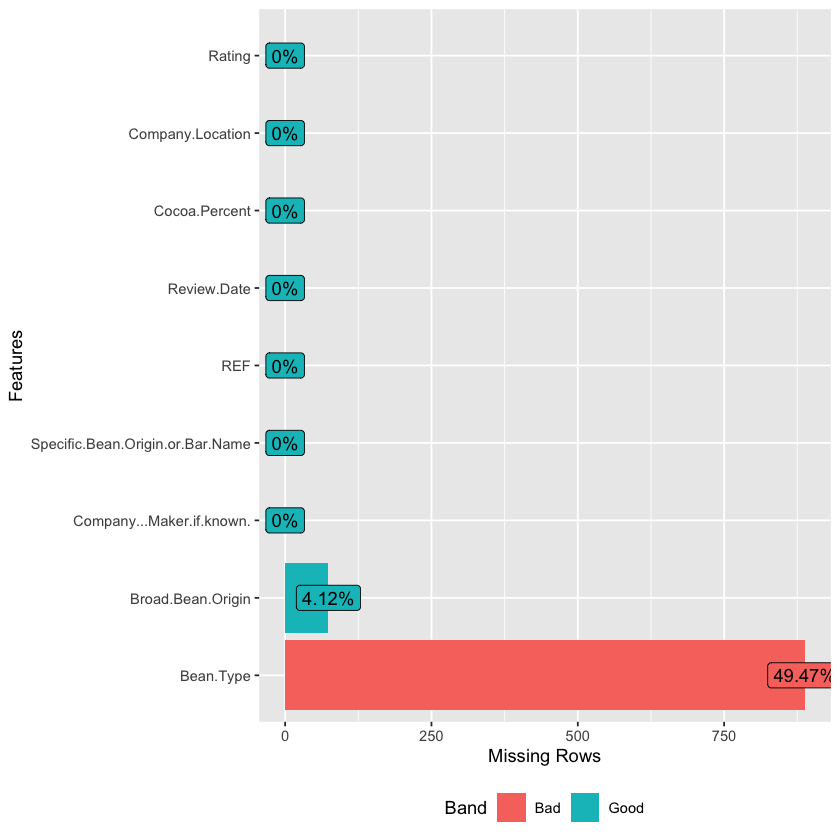

In [4]:
plot_missing(choco)

Vemos que casi un 50% de los registros no tienen el dato del tipo de grano. Hay también valores faltantes sobre la zona de origen del grano.

### 3.5 Análisis de variables continuas

También interesa saber la distribución de valores de las variables continuas. Podemos analizarlo a través de histogramas o gráficos de densidad. Los siguientes comandos nos muestran datos de las variables Cocoa.Percent, REF y Rating. Cocoa.Percent y Rating tienen una distribución con forma aproximada a una campana, mientras que REF es más homogénea. 

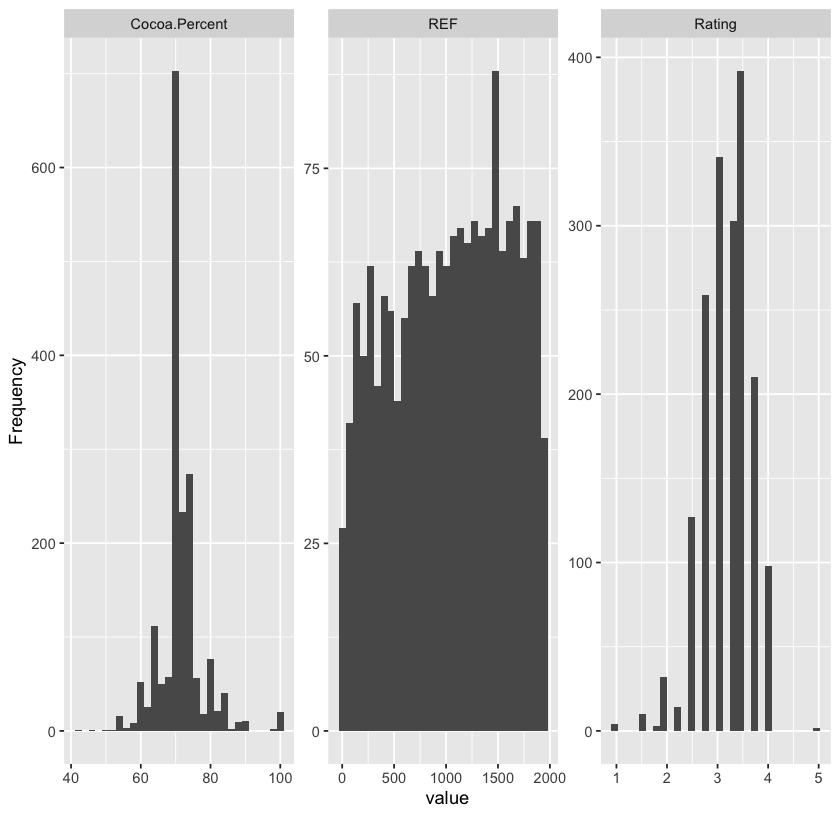

In [5]:
plot_histogram(choco)

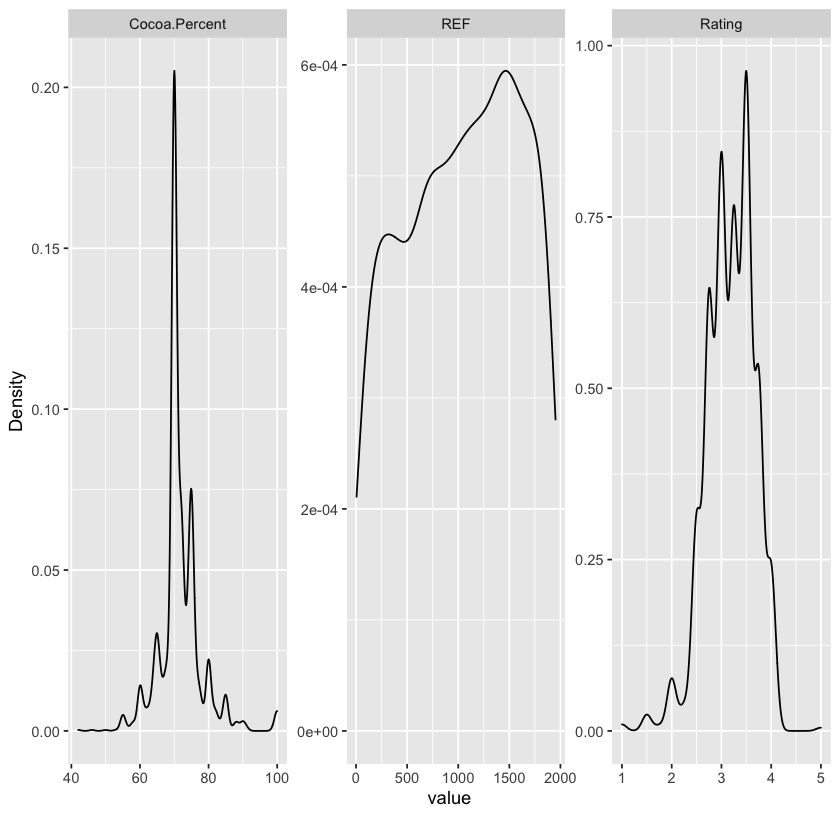

In [6]:
plot_density(choco)

### 3.6 Análisis de correlaciones

A continuación analizaremos la correlación entre las variables. Esto nos ayuda a hacer una selección de atributos que "valen la pena", por ejemplo a la hora de querer predecir una cierta variable. 

en el ejemplo del tutorial se representan solo las columnas continuas. Al ejecutar el comando apreciamos que ninguna incide de forma importante en ninguna otra. 


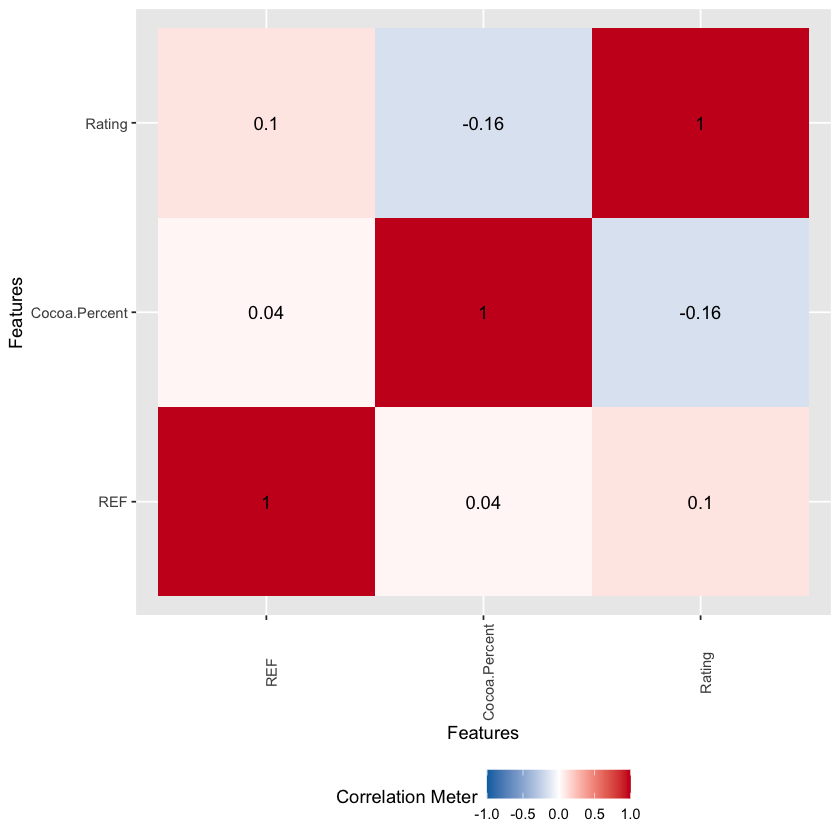

In [7]:
plot_correlation(choco, type = 'continuous')

Investigando en las opciones del comando, vemos la posibilidad de graficar todas las variables. En realidad, al ejecutarlo vemos que descarta las variables con más de 20 atributos, lo cual es configurable. 
El comando lo que muestra, para el caso de las variables categóricas, es la correlación a nivel de los valores de la variable.

5 features with more than 20 categories ignored!
Company...Maker.if.known.: 416 categories
Specific.Bean.Origin.or.Bar.Name: 1039 categories
Company.Location: 60 categories
Bean.Type: 41 categories
Broad.Bean.Origin: 100 categories




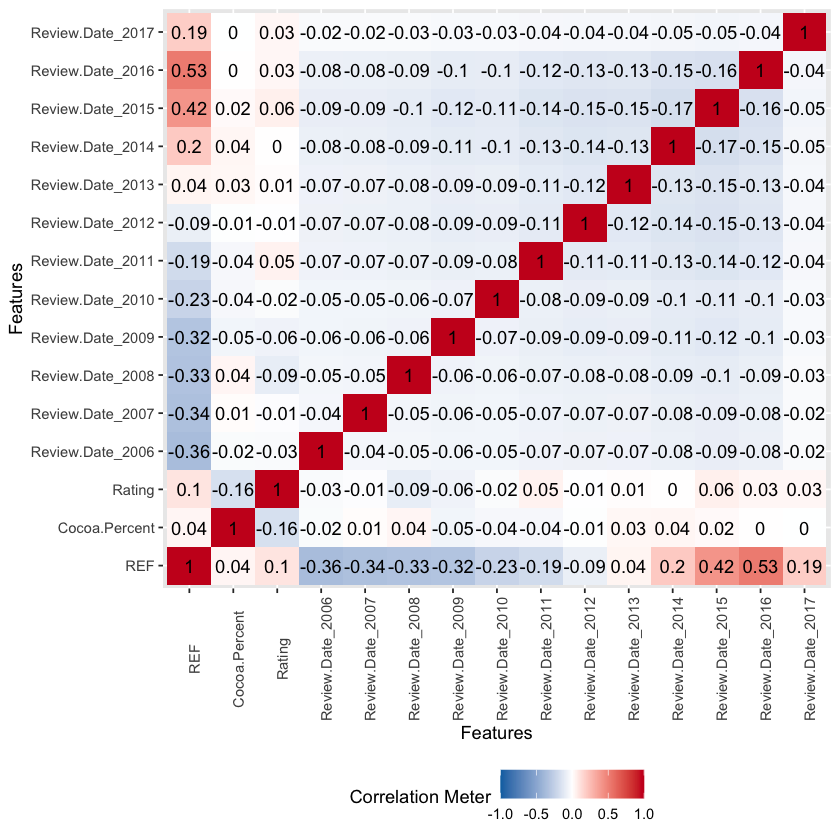

In [8]:
plot_correlation(choco, type = 'all')

### 3.7 Análisis de variables categóricas

Para analizar a las variables categóricas de forma similar a lo que hicimos con las variables Continuas, tenemos el comando plot_bar. Este comando muestra la distribución para las variables que tienen menos de 50 categorías. Es por eso que al ejecutar el comando nos indica cuales columnas se han ignorado. Para nuestro dataset, solo tenemos a disposición información de 2 columnas.  

4 columns ignored with more than 50 categories.
Company...Maker.if.known.: 416 categories
Specific.Bean.Origin.or.Bar.Name: 1039 categories
Company.Location: 60 categories
Broad.Bean.Origin: 100 categories




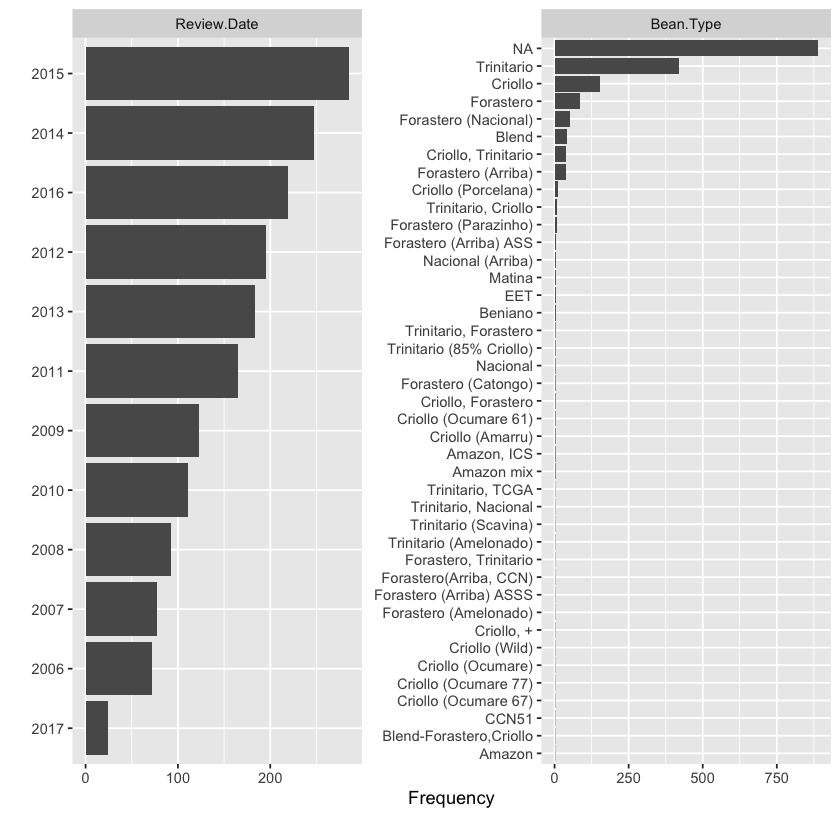

In [9]:
plot_bar(choco)

Si configuramos el campo de maxcat podemos ver otras variables, pero el resultado resulta un poco ilegible.

2 columns ignored with more than 102 categories.
Company...Maker.if.known.: 416 categories
Specific.Bean.Origin.or.Bar.Name: 1039 categories




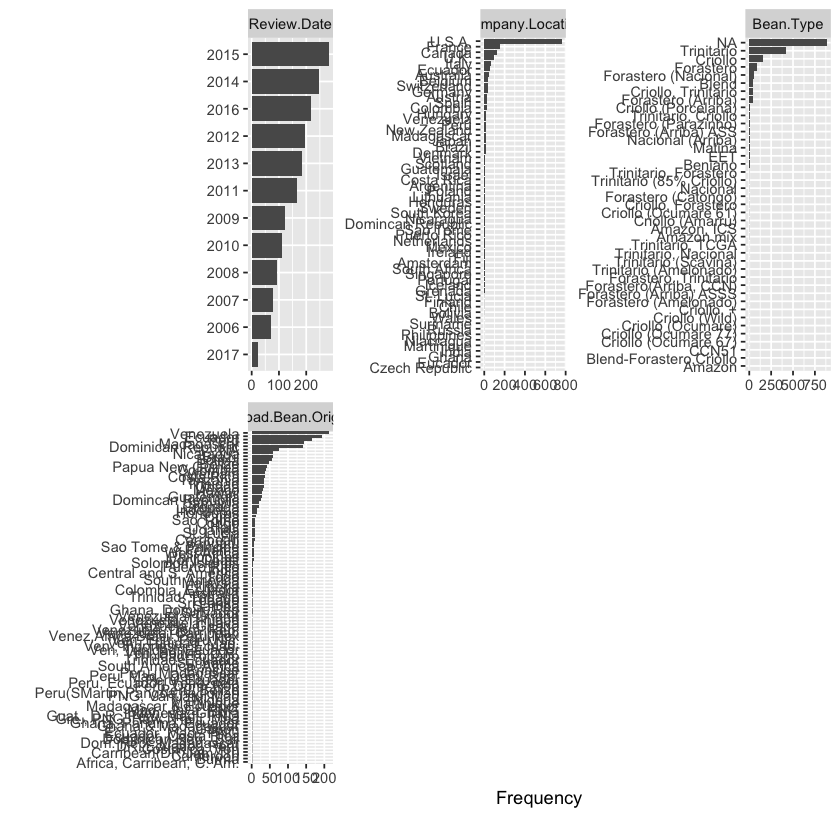

In [10]:
plot_bar(choco, maxcat = 102)

### 3.8 Todo en uno: reporte de DataExplorer

Si queremos tener toda la información anterior en un solo reporte, podemos ejecutar el siguiente comando, que nos dará un reporte en HTML. 

In [11]:

create_report(choco)



processing file: report.rmd



  |..                                                                    |   2%
   inline R code fragments

  |...                                                                   |   5%
label: global_options (with options) 
List of 1
 $ include: logi FALSE

  |.....                                                                 |   7%
  ordinary text without R code

  |.......                                                               |  10%
label: introduce
  |........                                                              |  12%
  ordinary text without R code

  |..........                                                            |  14%
label: plot_intro
  |............                                                          |  17%
  ordinary text without R code

  |.............                                                         |  19%
label: data_structure
  |...............                                                       |  21%
  ordinary text without R c

output file: /Users/luciabouza/FING/Documents/ciencia de datos/tarea2/report.knit.md




/Applications/RStudio.app/Contents/MacOS/pandoc/pandoc +RTS -K512m -RTS '/Users/luciabouza/FING/Documents/ciencia de datos/tarea2/report.utf8.md' --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash+smart --output pandocc36460f69cb4.html --email-obfuscation none --self-contained --standalone --section-divs --table-of-contents --toc-depth 6 --template /Library/Frameworks/R.framework/Versions/3.6/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:yeti' --include-in-header /var/folders/4d/gd5fbqvs5g3cwxzz57bmhc_m0000gn/T//Rtmpko8aLI/rmarkdown-strc364191f77de.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --lua-filter /Library/Frameworks/R.framework/Versions/3.6/Resources/library/rmarkdown/rmd/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/3.6/Resources/library/rmarkdown/rmd/lua/latex-div.lua 



Output created: report.html

